Results from SCARGC algorithm (for boxplot and accuracy timelime).
NOAA dataset. Eight  features. Two classes.
Stream mode with pool size = 300



METHOD: Static knn as classifier
Execution time:  6.533274258459552
Average MCC:  0.220024958935
Average error: 28.6812
Average micro-F1: 0.7532
Average Accuracy:  71.3188
Standard Deviation:  4.33062565457
Variance:  18.75431856


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


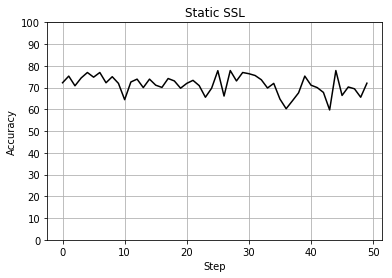

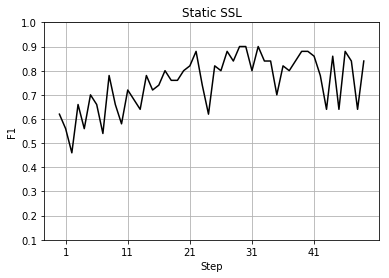




METHOD: Sliding knn as classifier


C:\Users\raul\Desktop\GITHUB\Systems-Engineering\Dissertation\source\classifiers.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return KNeighborsClassifier(n_neighbors=K, algorithm = 'brute').fit(X, y)


Execution time:  7.475020059251334
Average MCC:  0.00665837366356
Average error: 31.3346
Average micro-F1: 0.726
Average Accuracy:  68.6654
Standard Deviation:  5.00246947417
Variance:  25.02470084


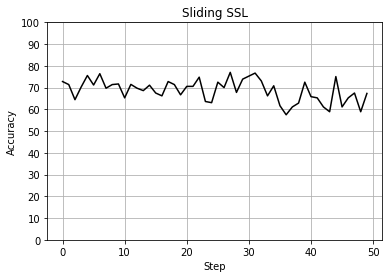

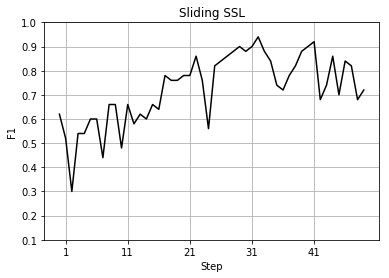




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  432.47939852665735
Average MCC:  0.160215266348
Average error: 29.9356
Average micro-F1: 0.7484000000000001
Average Accuracy:  70.0644
Standard Deviation:  4.71632024358
Variance:  22.24367664


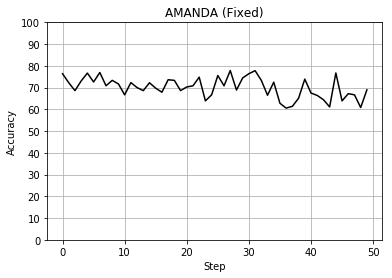

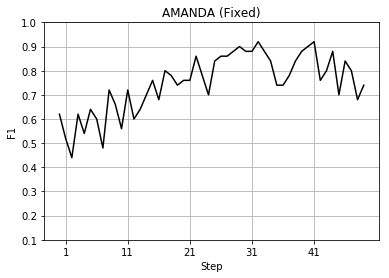




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  359.5928163583936
Average MCC:  0.131219358221
Average error: 43.6052
Average micro-F1: 0.5508000000000001
Average Accuracy:  56.3948
Standard Deviation:  15.7605775579
Variance:  248.39580496


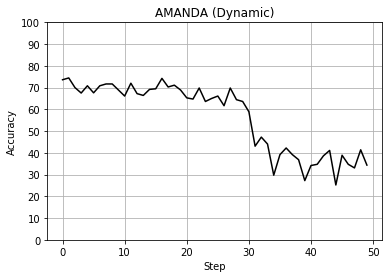

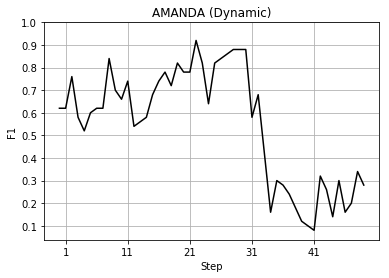




Method: SCARGC
Execution time:  359.5928163583936
Average MCC:  0.0232943169666
Average micro-F1: 0.4056
Average Accuracy:  68.772807238
Standard Deviation:  2.46024348391
Variance:  6.05279800015


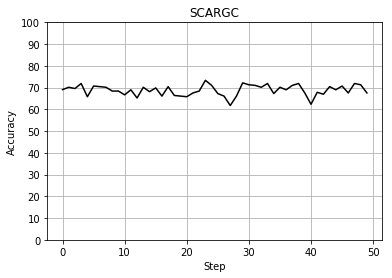

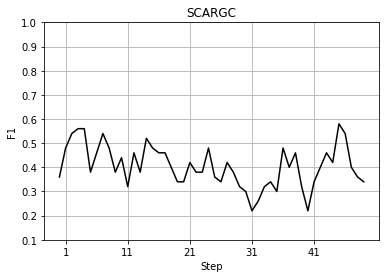

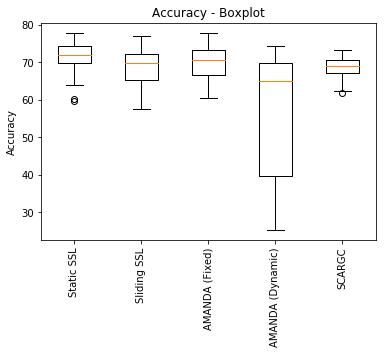

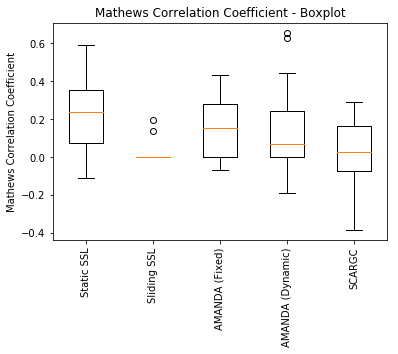

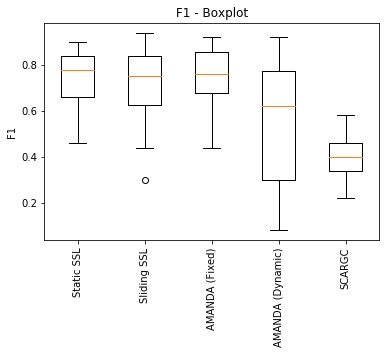

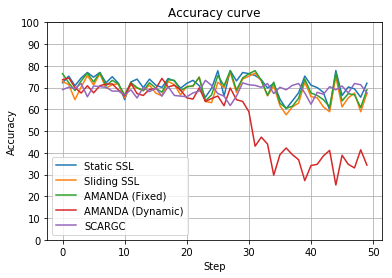

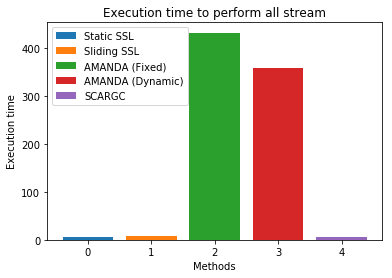

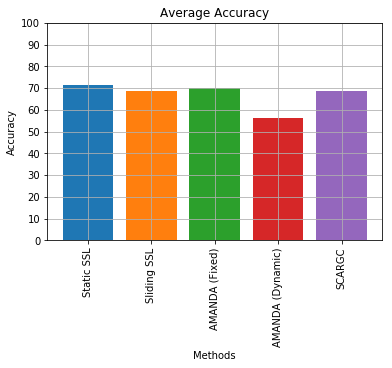

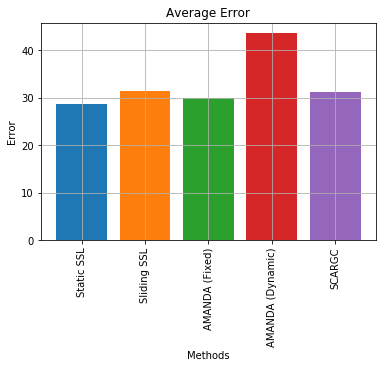

Error reduction: -3.72047763002
Error reduction: -1.75886302069
Error reduction: -20.925758706
Error reduction: -3.56987605232


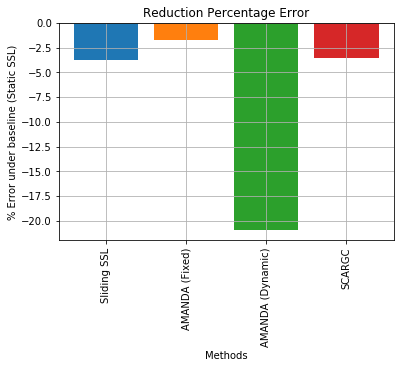

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import scargc_1NN
import numpy as np



class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K

        
def accSCARGC(path, sep, key, steps):
    resultsSCARGC_1, resultsSCARGC_2 = setup.loadSCARGCBoxplotResults(path, sep)
    results = resultsSCARGC_2[key]
    res = [ results[i::steps] for i in range(steps) ]
    arrAcc = []
    for i in range(steps):
        arrAcc.append(sum(res[i])/len(res[i])*100)
    return arrAcc, results


#only for binary classification
def labelSCARGC(resultsSCARGC, true_labels):
    predictions = []
    true_labels = np.array(true_labels)
    true_labels = true_labels.flatten()
    #print(true_labels)
    for i in range(len(true_labels)):
        if resultsSCARGC[i] == 1:
            predictions.append(true_labels[i])
        else:
            if true_labels[i] == 0:
                predictions.append(1)
            else:
                predictions.append(0)
    return predictions



def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 50
    labeledData = 150
    poolSize = 300
    isBatchMode = False # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    
    #sinthetic
    dataValues, dataLabels, description = setup.loadNOAADataset(path, sep)
    

    # Static SSL
        experiments[0] = Experiment(static_classifier, 2, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 2, clfName=sslClassifier)
    
    # Incremental SSL
    #experiments[2] = Experiment(incremental_LN, 2, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 6, 0.5, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier)

    # SCARGC 1NN (Python version)
    #experiments[5] = Experiment(scargc_1NN, 2)
    arrAccSCARGC, predictionsSCARGC = accSCARGC(path, sep, 'noaa', steps)
    #predictionsSCARGC = labelSCARGC(predictionsSCARGC, dataLabels[labeledData:])
    arrPredictionsSCARGC = [ predictionsSCARGC[i::steps] for i in range(steps) ]
    externalResults.append({"name":"SCARGC", "predictions":arrPredictionsSCARGC, "accuracies":arrAccSCARGC, "time":6.05})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)



if __name__ == "__main__":
    main()